# Data Analysis Report
- A report of the retained data and it contains things like data distribution, time window, frequency band, SNR statistics, waveform plot in event gather, etc.
- For making the data analysis report, I have used **NSFE** data from **IRIS** provider for the duration **2021-2022**. Since, the number of processed files are too large, I have used data from only a couple of events.

In [1]:
import os
import glob
import obspy
import pygmt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from obspy.io.sac.sactrace import SACTrace
from obspy.io.sac.util import get_sac_reftime
from IPython.display import clear_output

In [2]:
read_root_dir = "/media/elemento/Element/NTU_RW/NSFE"
write_root_dir = "/home/elemento/Music/Processing/Report_NSFE"

try:
    os.mkdir(write_root_dir)
except:
    print("The directory already exists!")

The directory already exists!


In [3]:
provider = "IRIS"
year1 = 2021
year2 = 2022

data_sac = f'{read_root_dir}/Download/{provider}/SAC/{year1}'
os.listdir(data_sac)

['20210101012009649',
 '20210103045749272',
 '20210103123848915',
 '20210103191357923',
 '20210104025829611',
 '20210105115618094',
 '20210106062035947',
 '20210106172835120',
 '20210106205934315',
 '20210106214745765',
 '20210107012731280',
 '20210108002850091',
 '20210108034857784',
 '20210108114158720',
 '20210108164958059',
 '20210108183641490',
 '20210109082301606',
 '20210111012038218',
 '20211226154257107',
 '20211227001149024',
 '20211227094406285',
 '20211227113408254',
 '20211227133104395',
 '20211229000100663',
 '20211229035732869',
 '20211229092857945',
 '20211229135830777',
 '20211229213022185',
 '20211230001954707',
 '20211230064708885',
 '20211230131317562',
 '20211230132436748',
 '20211230191929687',
 '20211231055342198',
 '20211220201020310',
 '20211220201031310',
 '20211221025512180',
 '20211221164240753',
 '20211221164659399',
 '20211221210833831',
 '20211221224215051',
 '20211224014122595',
 '20211224134322922',
 '20211225092012389',
 '20211225123913730',
 '20211225

In [4]:
# Creating an info file (in the write directory)
os.chdir(write_root_dir)
f = open(f"saclist_{provider}", "w")
f.write("sacfile dist evdp mag Tp Tb stlo stla evlo evla\n")

48

- For checking out the information contained in a single SACTrace, refer to this [page](https://docs.obspy.org/packages/autogen/obspy.io.sac.header.html).
- We will be using the following attributes, and we have defined column names as above for these attributes:
    - sacfile: Name of the Event
    - dist: Station to event distance (km)
    - evdp: Event depth below surface (meters)
    - mag: Event magnitude
    - Tp: P Phase arrival time wrt the starting instance
    - b: Beginning value of the independent variable
    - evla: Event latitude (degrees north positive)
    - evlo: Event longitude (degrees east positive)

In [5]:
# Iterating over 50 events
i = 1
ev_considered = []

for ev in os.listdir(data_sac):
    print("For Event:", ev)
    ev_considered.append(ev)
    inpath = os.path.join(data_sac, ev)
    os.chdir(inpath)

    # https://docs.obspy.org/packages/autogen/obspy.io.sac.header.html
    # Iterating over all the SAC files
    for sac in glob.glob("*.SAC.bp"):
        st = SACTrace.read(sac)
        evtnm = "{}.{}.{}.{}".format(str(sac).split(".")[0],str(sac).split(".")[1],str(sac).split(".")[2],str(sac).split(".")[3])
        dist = st.dist
        evdp = st.evdp
        mag = st.mag
        Tp = st.t1
        Tb = st.b
        stlo = st.stlo
        stla = st.stla
        evlo = st.evlo
        evla = st.evla
    
        f.write("%s %.0f %.1f %g %g %g %g %g %g %g\n" % (evtnm,dist,evdp,mag,Tp,Tb,stlo,stla,evlo,evla))        
    
    if i >= 50: break
    i += 1
    
# Close the info file
f.close()

For Event: 20210101012009649
For Event: 20210103045749272
For Event: 20210103123848915
For Event: 20210103191357923
For Event: 20210104025829611
For Event: 20210105115618094
For Event: 20210106062035947
For Event: 20210106172835120
For Event: 20210106205934315
For Event: 20210106214745765
For Event: 20210107012731280
For Event: 20210108002850091
For Event: 20210108034857784
For Event: 20210108114158720
For Event: 20210108164958059
For Event: 20210108183641490
For Event: 20210109082301606
For Event: 20210111012038218
For Event: 20211226154257107
For Event: 20211227001149024
For Event: 20211227094406285
For Event: 20211227113408254
For Event: 20211227133104395
For Event: 20211229000100663
For Event: 20211229035732869
For Event: 20211229092857945
For Event: 20211229135830777
For Event: 20211229213022185
For Event: 20211230001954707
For Event: 20211230064708885
For Event: 20211230131317562
For Event: 20211230132436748
For Event: 20211230191929687
For Event: 20211231055342198
For Event: 202

In [6]:
df = pd.read_csv(f"{write_root_dir}/saclist_{provider}", sep=" ", 
    usecols=["sacfile","dist","evdp","mag","Tp","Tb","stlo","stla","evlo","evla"])

df.describe()

,dist,evdp,mag,Tp,Tb,stlo,stla,evlo,evla
count,501.000000,501.000000,501.00000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,6561.269461,113.160279,5.36517,544.726529,0.008443,98.558757,21.272949,3.335567,6.178802
std,3973.572124,187.131327,0.40912,241.851964,0.010496,3.121188,2.972443,138.596434,31.611365
min,246.000000,9.500000,5.00000,36.909000,0.000000,91.127000,16.573500,-179.793000,-55.870100
25%,3259.000000,10.000000,5.00000,356.141000,0.002536,96.340200,18.814100,-172.847000,-17.934300
50%,5134.000000,20.900000,5.20000,490.417000,0.005000,98.944400,21.205700,92.529200,0.065800
75%,10165.000000,106.800000,5.60000,744.636000,0.009000,100.969000,24.179400,122.499000,31.106400
max,17307.000000,639.200000,6.30000,1073.080000,0.049538,103.907000,29.703100,170.651000,85.161300


## Plotting the Events & Stations Distribution

In [7]:
# Defining the Region
minlon = min(df.evlo)
maxlon = max(df.evlo)
minlat = min(df.evla)
maxlat = max(df.evla)

# Defining the Center Coordinates for the Study Region
lonc = 97
latc = 24

region = [
    minlon, maxlon,
    minlat - 1, maxlat + 1,   
]
print("Coordinates for the Region:", region)

Coordinates for the Region: [-179.793, 170.651, -56.8701, 86.1613]


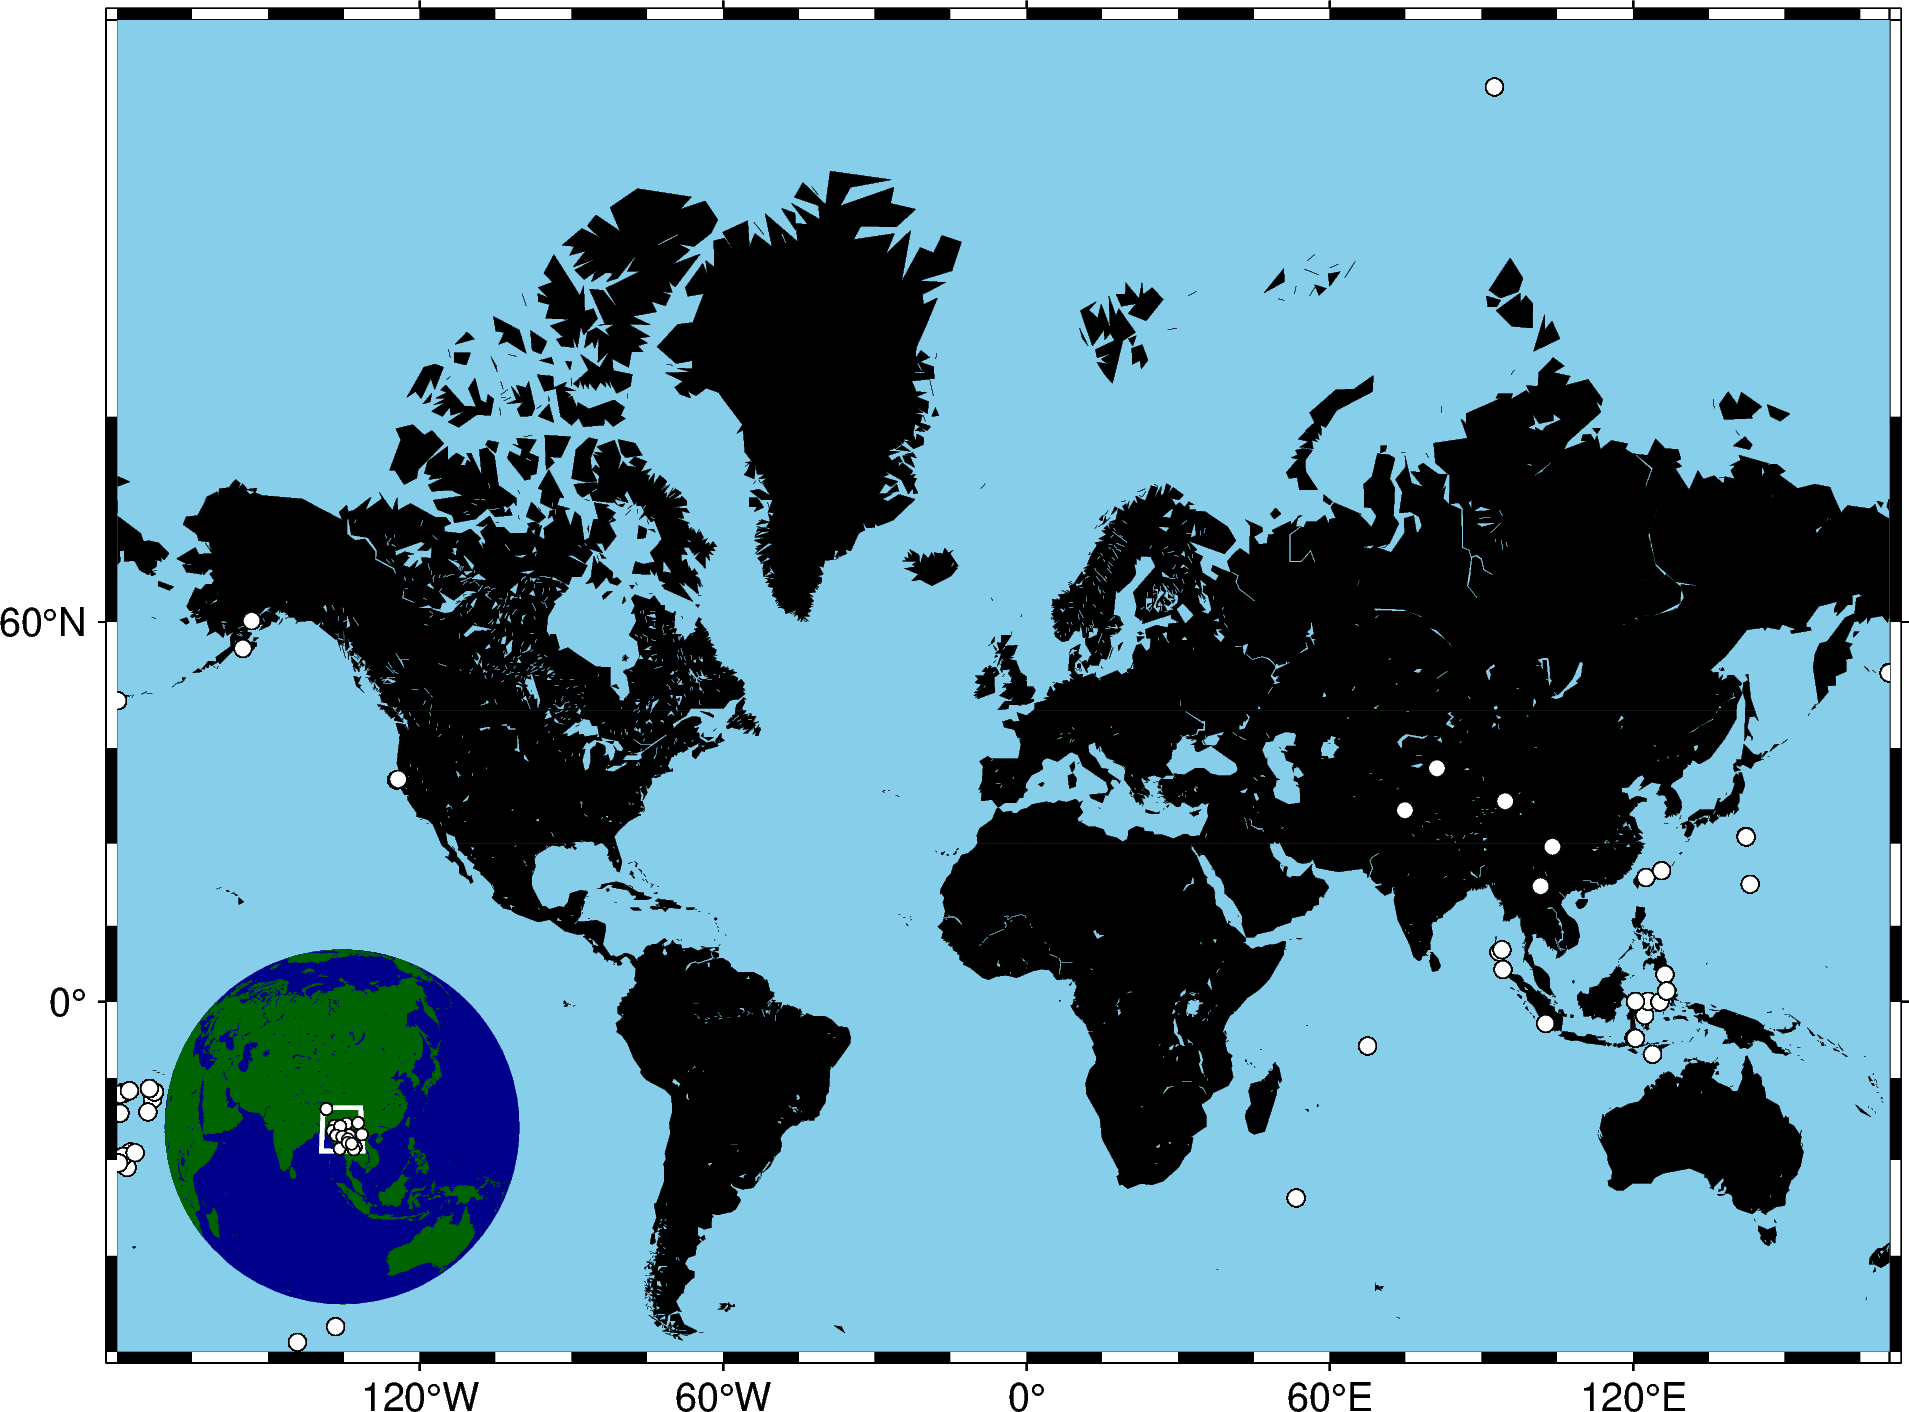

In [8]:
# Plotting circles on the Event Epicenters
fig = pygmt.Figure()
fig.basemap(region = region, projection = "M15c", frame = True)
fig.coast(land = "black", water = "skyblue")
fig.plot(x = df.evlo, y = df.evla, style="c0.15c", color="white", pen="black")

with fig.inset(position="jbl+w3.0c+o0.4c/0.4c"):
    fig.coast(
        region="g",
        projection=f"G{lonc}/{latc}/?",
        land="darkgreen",
        water="darkblue"
    )
    
    # Study area
    fig.plot(
      x = [90, 90, 104, 104, 90],
      y = [16, 30, 30, 16, 16],
      pen = "1p,white"
    )
    
    # Stations
    fig.plot(
      x = df.stlo,
      y = df.stla,
      style="c0.1c",
      color="white", 
      pen="black"
    )
    
fig.show()

## Plotting the distribution of event depth

Minimum Event Depth: 9.5 meters
Maximum Event Depth: 639.2 meters


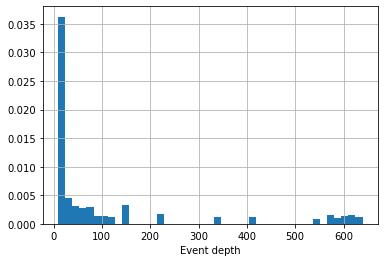

In [9]:
print(f"Minimum Event Depth: {min(df.evdp)} meters")
print(f"Maximum Event Depth: {max(df.evdp)} meters")

plt.hist(df.evdp, bins = 43, density = True)
plt.xlabel("Event depth")
plt.grid()
plt.show()

## Plotting the distribution of event magnitude

Minimum Magnitude: 5.0
Maximum Magnitude: 6.3


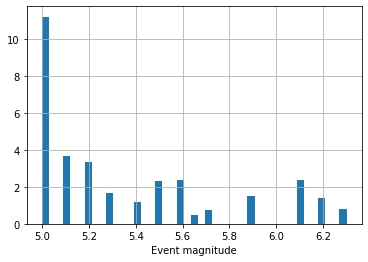

In [10]:
print(f"Minimum Magnitude: {min(df.mag)}")
print(f"Maximum Magnitude: {max(df.mag)}")

plt.hist(df.mag, bins = 43, density = True)
plt.xlabel("Event magnitude")
plt.grid()
plt.show()

## Plotting the Distribution of distance b/w events and station

Minimum Distance: 246 km
Maximum Distance: 17307 km


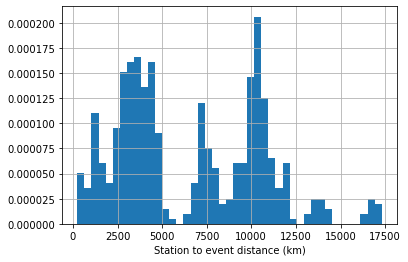

In [11]:
print(f"Minimum Distance: {min(df.dist)} km")
print(f"Maximum Distance: {max(df.dist)} km")

plt.hist(df.dist, bins = 43, density = True)
plt.xlabel("Station to event distance (km)")
plt.grid()
plt.show()

## Plotting the Distribution of P-phase arrival time

Minimum P-Phase Arrival Time: 36.909 seconds
Maximum P-Phase Arrival Time: 1073.08 seconds


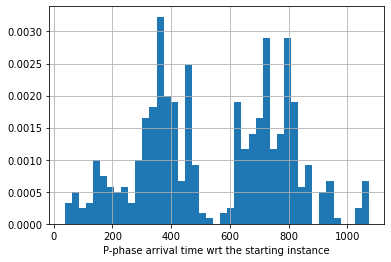

In [12]:
print(f"Minimum P-Phase Arrival Time: {min(df.Tp)} seconds")
print(f"Maximum P-Phase Arrival Time: {max(df.Tp)} seconds")

plt.hist(df.Tp, bins = 43, density = True)
plt.xlabel("P-phase arrival time wrt the starting instance")
plt.grid()
plt.show()

## Plotting the Original SNR Statistics

In [13]:
snr_stats = []

for ev in ev_considered:
    inpath = os.path.join(data_sac, ev)
    os.chdir(inpath)
    
    df = pd.read_csv(f"snr.info", sep=" ", names=["snr","sacfile"])
    snr_stats.extend(df.snr)

snr_stats = pd.Series(snr_stats)
snr_stats.describe()

count      597.000000
mean       102.211810
std       1240.054349
min          0.848513
25%          3.384260
50%          4.736100
75%          9.730802
max      21746.812797
dtype: float64

Minimum SNR: 0.8485131427440514
Maximum SNR: 21746.81279703871


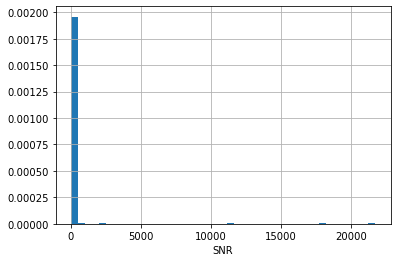

In [14]:
print(f"Minimum SNR: {min(snr_stats)}")
print(f"Maximum SNR: {max(snr_stats)}")

plt.hist(snr_stats, bins = 43, density = True)
plt.xlabel("SNR")
plt.grid()
plt.show()

## Plotting the Refined SNR Statistics

In [15]:
snr_ref_stats = pd.Series([stat for stat in snr_stats if stat >= 3])
snr_ref_stats.describe()

count      501.000000
mean       121.318721
std       1353.035473
min          3.010370
25%          3.959952
50%          5.708129
75%         13.110422
max      21746.812797
dtype: float64

Minimum SNR: 3.010369842413303
Maximum SNR: 21746.81279703871


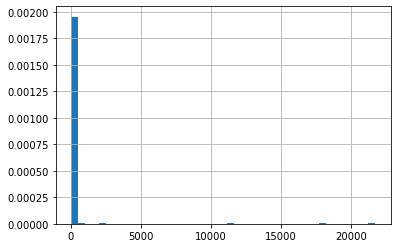

In [16]:
print(f"Minimum SNR: {min(snr_ref_stats)}")
print(f"Maximum SNR: {max(snr_ref_stats)}")

plt.hist(snr_ref_stats, bins = 43, density = True)
plt.grid()
plt.show()